# **This Assignment is done by N M Emran Hussain (GWID: 24414095)**

## **DNSC6315 Assignments**

We use Capital Bikeshare data for the analysis in DNSC6315 assignments.

### Read data from drive or local

In [1]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [2]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Focus on GWSB Station: '22nd & H St NW'

### Bike Availability: Number of Pickups

In [3]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

started_at_date
2024-02-01    33
2024-02-02    23
2024-02-03    22
2024-02-04    18
2024-02-05    19
              ..
2024-04-26    33
2024-04-27    18
2024-04-28    36
2024-04-29    37
2024-04-30    40
Name: started_at_date, Length: 90, dtype: int64

## Dock Availability: Number of Dropoffs

In [4]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

ended_at_date
2024-02-01    33
2024-02-02    25
2024-02-03    20
2024-02-04    19
2024-02-05    23
              ..
2024-04-26    39
2024-04-27    24
2024-04-28    28
2024-04-29    38
2024-04-30    39
Name: ended_at_date, Length: 90, dtype: int64

## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [5]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts
PU_DO_counts.to_excel('PU_DO_counts.xlsx', index=False)

# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [6]:
df_weather = pd.read_csv('DC_weather_2024.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


## Drop variables of your choice

In [7]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [8]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Prepare training and test data

In [9]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


## <font color="red"> Important: train_test_split with y=['PU_ct','DO_ct']. Why? <font>

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

# **Assignment 1: Classification Tree and Performance Evaluation**

### As we discussed in class, our intuition is to allocate more bikes if PU_ct > DO_ct; and less bikes if PU_ct < DO_ct. Thus, in this assignment, we want to predict whether PU_ct > DO_ct. We first create a new target variable to indicate whether PU_ct > DO_ct.

## <font color="red"> Additional Preprocessing Steps <font>

### Create categorical target variable 'Which_High' with classes {'PU_High','DO_High'}

In [16]:
# create a new variable to indicate if PU_ct > DO_ct in y_train and y_test
# create 'Which_High' with classes in string for plot_tree

y_train['PU_gt_DO'] = y_train['PU_ct'] > y_train['DO_ct']
y_train['Which_High'] = y_train['PU_gt_DO'].map({True: 'PU_High', False: 'DO_High'})

y_test['PU_gt_DO'] = y_test['PU_ct'] > y_test['DO_ct']
y_test['Which_High']=y_test['PU_gt_DO'].map({True: 'PU_High', False: 'DO_High'})


### Dummy encoding of categorical feature 'icon' before training

In [17]:
# get dummies in X_train_PU
X_train = pd.get_dummies(X_train, columns=['icon'], prefix='icon',drop_first=True)
# get dummies in X_test_PU
X_test = pd.get_dummies(X_test, columns=['icon'], prefix='icon',drop_first=True)

# Ensure both training and testing sets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [18]:
X_train.head()

,temp,precip,windspeed,uvindex,icon_partly-cloudy-day,icon_rain,icon_snow
73,66.0,0.000,22.5,8,True,False,False
60,53.9,0.235,13.1,4,False,True,False
18,41.1,0.000,11.2,7,False,False,False
44,56.6,0.000,18.8,8,True,False,False
4,41.0,0.000,12.2,6,True,False,False


## <font color="red"> Task 1: </font> Train and visualize a classification tree with max_depth=3 for predicting 'Which_High' using 'entropy' as the criterion. [10 pts]

This Python code snippet uses the **DecisionTreeClassifier** from the **sklearn.tree** module to construct and visualize a decision tree for classification purposes. Initially, a decision tree classifier (dtc) is created with a maximum depth of 3 levels and uses the 'entropy' criterion for making splits, which aims to maximize information gain at each node. This classifier is then trained on a dataset (**X_train**, **y_train**) where **X_train** contains the feature variables and **y_train['Which_High']** contains the target class labels. Once trained, the classifier (**dtc_model**) is visualized using **matplotlib** and **plot_tree**. The tree visualization is configured to display with a figure size of 16x12 inches and includes descriptive labels for branches and nodes using feature names (fn) from **X_train** and class names (cn) derived from the model. The **filled = True** and **proportion=True** options color the nodes to reflect the majority class and show the proportion of samples in each leaf, respectively, enhancing interpretability of the tree structure.

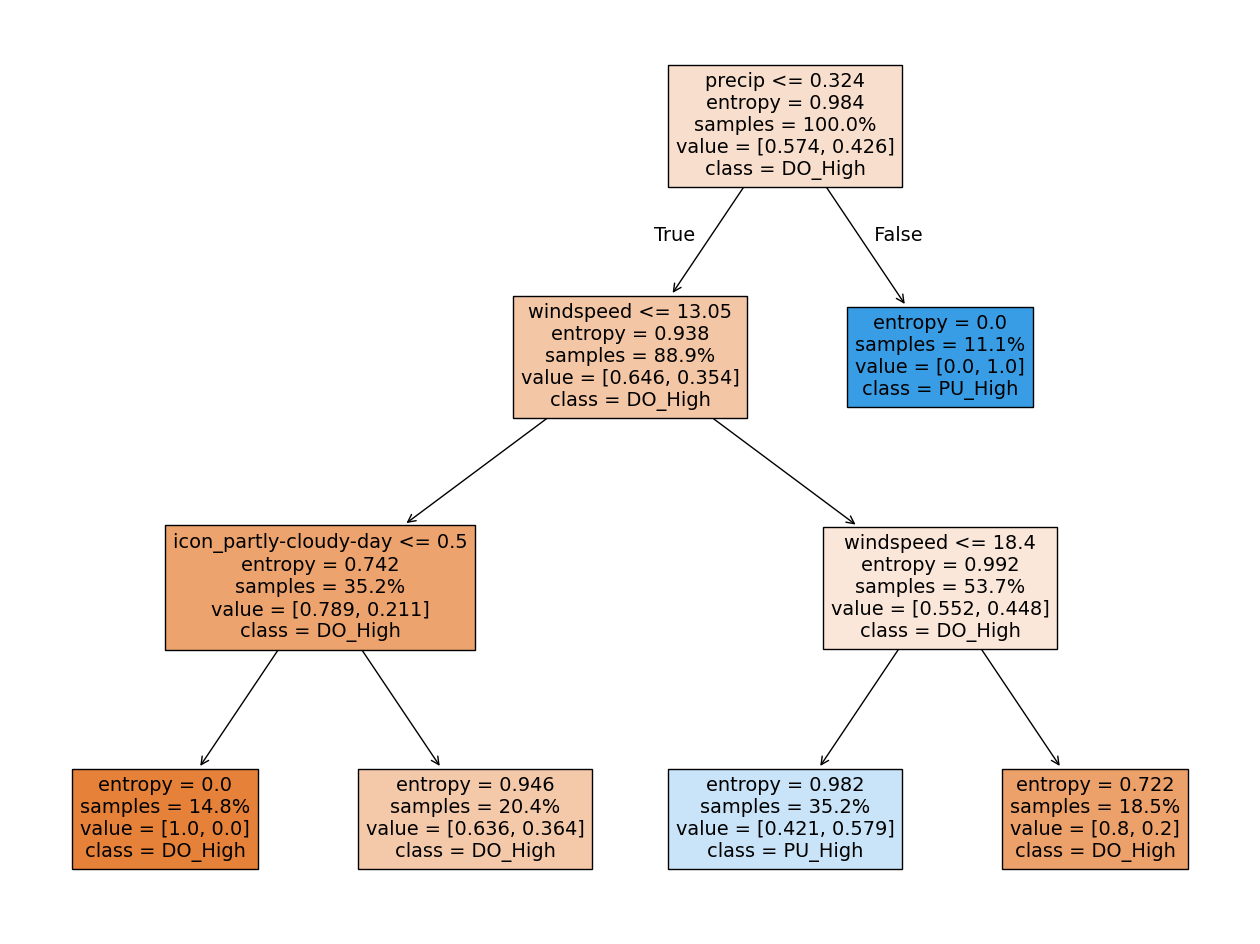

In [19]:
from sklearn.tree import DecisionTreeClassifier

# set max_depth
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtc_model=dtc.fit(X_train,y_train['Which_High'])

# Visualize classification tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = list(X_train.columns) # specify feature names
cn = dtc_model.classes_ # specify class names
plt.figure(figsize = (16,12))
plt.title('Decision Tree (max_depth=3)')
plot_tree(dtc_model, feature_names = fn, class_names = cn, filled = True, proportion=True);

## <font color="red"> Task 2: </font> Pick the first sample in the test data and report its estimated probability of 'PU_High'. [10pts]

In this code snippet, the trained decision tree classifier (**dtc_model**) is used to predict the class probabilities for a single instance from the **test dataset (X_test)**. Specifically, **predict_proba** is called on the first row of **X_test (X_test.iloc[[0]])**, which returns an array of probabilities corresponding to each class that the classifier can predict. The array **y_prob** holds these probabilities, and the result is printed out to show the likelihood of each class for the given instance. Following this, the code extracts and prints the probability of the specific class labeled 'PU_High', which is represented by the second element of the array **(y_prob[0][1])**. This value indicates the estimated probability that the first instance of **X_test** belongs to the 'PU_High' class according to the decision tree model.

In [20]:
# The class probabilies
y_prob = dtc_model.predict_proba(X_test.iloc[[0]])
print(y_prob)

# Estimated probability of 'PU_High'
y_prob_PU_High = y_prob[0][1]
print(y_prob_PU_High)

[[0.8 0.2]]
0.2


## <font color="red"> Task 3: </font> Report the classification tree model's plain accuracy in the test data. [10pts]

This code evaluates the performance of the trained decision tree classifier **(dtc_model)** on the test dataset **(X_test)**. It begins by predicting the target class labels **(y_pred)** for all instances in **X_test** using the predict method of the classifier. Following this, it assesses the accuracy of these predictions by comparing them to the actual target labels found in **y_test['Which_High']** using the **accuracy_score** function from the **sklearn.metrics** module. The accuracy score is then printed, which quantifies the proportion of correct predictions made by the classifier. This metric provides a straightforward indication of how well the decision tree model is performing, with a higher score indicating better performance. The accuracy score is a commonly used metric to evaluate the effectiveness of classification models, especially for balanced datasets.

In [21]:
from sklearn.metrics import accuracy_score
# Evaluate in the test data
y_pred = dtc_model.predict(X_test)
print("Plain accuracy of Classification Tree: ",accuracy_score(y_test['Which_High'], y_pred))

Plain accuracy of Classification Tree:  0.5277777777777778


## <font color="red"> Task 4: </font> Show the confusion matrix of this classification tree in the test data [10 pts]

This code snippet is focused on visualizing the performance of a decision tree classifier **(dtc_model)** using a confusion matrix, which provides a detailed breakdown of prediction results on the test dataset **(X_test)**. Initially, predictions are made for the test data using the predict method, storing the results in **y_pred**. The **confusion_matrix** function from **sklearn.metrics** is then used to generate the confusion matrix (**cm**) by comparing these **predictions (y_pred)** with the actual **target labels (y_test['Which_High'])**. This matrix is a two-dimensional array where each row represents the instances in an actual class while each column represents the instances in a predicted class.

The matrix is visualized using the **seaborn** library's **heatmap** function. Aesthetically, it uses the **Blues** color map and displays actual numbers of predictions (**fmt="d"**) within each cell of the grid. Labels for the axes are set—**xticklabels** and **yticklabels** are labeled with the class names (cn), representing the predicted and actual class labels, respectively. The labels on the x-axis indicate **Predicted** class outcomes, while the y-axis labels denote **True** class outcomes. A title is added, and the figure size is set to ensure the heatmap is clearly readable. This visualization effectively illustrates where the model is making correct predictions as well as where it is erring, offering insights into the types and frequencies of these errors, which is critical for refining model performance.

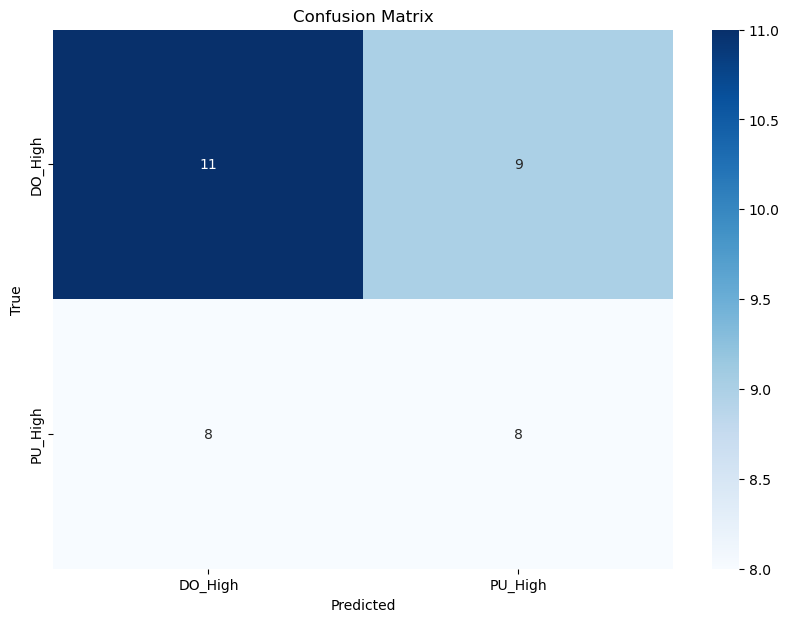

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the test set
y_pred = dtc_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test['Which_High'], y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=cn, yticklabels=cn)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## <font color="red"> Task 5: </font> Suppose we are interested in the class of 'DO_High' (i.e., we call it 'positive'). What are the true positive rate and the false positive rate of this classification tree? [10 pts]

This code snippet extends the evaluation of a decision tree classifier (**dtc_model**) by delving deeper into its predictive accuracy, focusing specifically on the classification of the **'DO_High'** class. After making predictions **y_pred** for the test dataset **X_test**, it constructs a **confusion matrix (cm)** using **confusion_matrix**, specifying that the rows and columns of the matrix should correspond to the classifier's known classes (**dtc_model.classes_**).

The code identifies the matrix index corresponding to the 'DO_High' class and uses this index to calculate various metrics: True Positives (TP, correctly predicted positive cases), False Negatives (FN, positive cases incorrectly predicted as negative), True Negatives (TN, correctly predicted negative cases for all classes except 'DO_High'), and False Positives (FP, negative cases incorrectly predicted as positive). These counts are used to compute the True Positive Rate (TPR, also known as sensitivity or recall) and the False Positive Rate (FPR). These rates are important metrics in evaluating a classifier's performance, particularly its ability to correctly identify positive instances and its propensity to incorrectly label negative instances as positive. The computed TPR and FPR are then printed, offering a clear view of the model's effectiveness and its potential biases in predicting the 'DO_High' class. This analysis is crucial for understanding the model's predictive dynamics and for identifying areas where the model might need improvement, especially in handling specific classes.

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the test set
y_pred = dtc_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test['Which_High'], y_pred, labels=dtc_model.classes_)

# Identify the index for 'DO_High'
positive_class_index = list(dtc_model.classes_).index('DO_High')

# True Positive (TP): Correct positive predictions
TP = cm[positive_class_index, positive_class_index]

# False Negative (FN): Incorrect negative predictions
FN = sum(cm[positive_class_index, :]) - TP

# True Negative (TN): Correct negative predictions
TN = sum(cm.diagonal()) - TP

# False Positive (FP): Incorrect positive predictions
FP = sum(cm[:, positive_class_index]) - TP

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

# Output TPR and FPR
print("True Positive Rate (Sensitivity, Recall):", TPR)
print("False Positive Rate:", FPR)


True Positive Rate (Sensitivity, Recall): 0.55
False Positive Rate: 0.5


## <font color="red"> Task 6: </font> Follow the sample code in 'Lec 2 ClassificationPerformance', compare the following methods by AUC evaluated under 5-fold cross-validation. [20 pts]
- Linear SVM, i.e., SVC(kernel = 'linear')
- KNN with K=10
- DecisionTreeClassifier(max_depth=3,criterion = 'entropy', random_state=0)


This Python script performs model evaluation on a classification problem using multiple machine learning algorithms. Specifically, it initializes three classifiers—Linear SVM, K-Nearest Neighbors (KNN), and Decision Tree—and evaluates their performance using 5-fold cross-validation. For each model, it calculates two metrics: accuracy and ROC AUC score (Area Under the Receiver Operating Characteristic Curve). These metrics are computed using cross-validation on the training data (X_train and y_train), with accuracy measuring overall correctness and ROC AUC capturing the model's ability to distinguish between classes for the target PU_gt_DO. The results—mean and standard deviation for both metrics—are stored in a DataFrame called model_results, which is then sorted by the average AUC score to identify the best-performing model in terms of class separation. The code helps compare model effectiveness in a systematic and statistically sound manner.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve

import warnings
warnings.simplefilter("ignore")

# Initialize classifiers in consideration
models = []
models.append(('Linear SVM', SVC(kernel='linear', probability=True)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 10)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=3, criterion = 'entropy', random_state=0)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train['Which_High'], cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train['PU_gt_DO'], cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['AUC Mean'], ascending=False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
0,Linear SVM,56.35,15.23,54.00,12.11
2,Decision Tree Classifier,41.43,15.39,59.45,6.34
1,KNN,39.67,11.47,52.00,5.70


#### Alternatively

This Python code performs a comparative evaluation of three different classification models on a training dataset, focusing on their ability to distinguish between two classes using Area Under the Curve (AUC) as the metric, calculated through 5-fold cross-validation. Initially, the target variable (y_train['Which_High']) is converted to a binary format where 'DO_High' is encoded as 0 and 'PU_High' as 1, which simplifies the classification problem into a binary format necessary for AUC calculation.

The models compared include a linear Support Vector Machine (SVM) with a linear kernel, a K-Nearest Neighbors (KNN) classifier with 𝑘 = 10, and a Decision Tree classifier with a maximum depth of 3 and using the entropy criterion. Each model is set up with a consistent random_state where applicable to ensure reproducibility of results.

The cross_val_score function from sklearn.model_selection is employed to conduct the 5-fold cross-validation for each model, specifying 'roc_auc' as the scoring parameter to compute the AUC, which measures the model's ability to discriminate between the two classes. AUC is a robust metric as it considers all possible classification thresholds.

The results, including the mean and the standard deviation of the AUC scores from the 5-fold cross-validation, are printed for each model. This output provides an insight into the average performance and the variability of performance across different folds for each classifier, assisting in assessing which model performs best at distinguishing between 'DO_High' and 'PU_High' under the given setup.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Convert target to binary (0=DO_High, 1=PU_High)
y_train_binary = (y_train['Which_High'] == 'PU_High').astype(int)

# Define models to compare
models = {
    "Linear SVM": SVC(kernel='linear', probability=True, random_state=0),
    "KNN (K=10)": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
}

# Evaluate each model using 5-fold cross-validation (AUC)
print("AUC Scores (5-Fold CV):")
for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train,
        y_train_binary,
        cv=5, # 5 fold
        scoring='roc_auc'
    )
    print(f"{name}: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

AUC Scores (5-Fold CV):
Linear SVM: 0.5286 (±0.0942)
KNN (K=10): 0.3342 (±0.1839)
Decision Tree: 0.5256 (±0.2337)


## <font color="red"> Task 7: </font> After selecting the best model, report its final out-of-sample performance measured by AUC. [10 pts]

This Python code segment is focused on training and evaluating a Linear Support Vector Machine (SVM) model, with a particular emphasis on its ability to distinguish between two classes, specifically whether or not the target class is 'PU_High'. The **SVC** class from **sklearn.svm** is used to instantiate a model with a linear kernel, probability estimation enabled, and a fixed random state for reproducibility. The model, referred to as **best_model**, is trained on the entire training dataset (**X_train, y_train_binary**), where **y_train_binary** appears to be a binary representation of the classes, but the code to create it from **y_train** is not shown here.

For evaluation, the test set is transformed into a binary format (y_test_binary) where instances of 'PU_High' are marked as 1, and all other instances as 0. The **predict_proba** method of the trained model is used to predict the probability that each test instance falls into the 'PU_High' category. These probabilities are then used to compute the Area Under the **Receiver Operating Characteristic Curve (AUC)** using the **roc_auc_score** from **sklearn.metrics**. AUC is a performance metric that measures the ability of a classifier to discriminate between the classes at various threshold settings. The higher the AUC, the better the model is at predicting 'PU_High' as compared to not-'PU_High'. The computed AUC score is printed, giving a concise and informative measure of the model's predictive quality in the context of its ability to handle the class 'PU_High'. This evaluation step is crucial for assessing the overall effectiveness of the SVM model in binary classification tasks, especially in applications where class imbalance might be a concern.

In [20]:
from sklearn.metrics import roc_auc_score

# Train the best model (Linear SVM) on full training data
best_model = SVC(kernel='linear', probability=True, random_state=0)
best_model.fit(X_train, y_train_binary)

# Predict probabilities on test data
y_test_binary = (y_test['Which_High'] == 'PU_High').astype(int)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of PU_High

# Calculate AUC
auc_score = roc_auc_score(y_test_binary, y_proba)
print(f"\nTest AUC (Best Model - Linear SVM): {auc_score:.4f}")


Test AUC (Best Model - Linear SVM): 0.6125
